In [113]:
###   Importação de bibliotecas   ###

In [114]:

import TCC_supercon_dados as tsd
import TCC_supercon_funcoes_apoio_ML as tsf
import numpy as np
from sklearn.metrics import mean_squared_error, r2_score
import pandas as pd
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import ExtraTreesRegressor
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans

In [115]:
### Divisão dos dados que serão usados em um processão de validação cruzada para obtenção de melhores parâmetros  ###

In [116]:
X_treino, X_teste, Y_treino, Y_teste = tsf.divisao_dados_treinamento(0.2,tsd.X_modelagem,tsd.Y_modelagem)

In [117]:
###   Treinamento do modelo com os melhores hiperparâmetros   ###

In [118]:
treino=ExtraTreesRegressor(bootstrap=False, criterion='mse', max_depth=20,
                    max_features=None, max_leaf_nodes=None,
                    min_impurity_decrease=0.0, min_impurity_split=None,
                    min_samples_leaf=2, min_samples_split=4,
                    min_weight_fraction_leaf=0.0, n_estimators=475, n_jobs=None,
                    oob_score=False, random_state=None, verbose=0,
                    warm_start=False)

In [119]:
###   Treino com todos os parâmetros   ###

treino.fit(X_treino,Y_treino)

ExtraTreesRegressor(bootstrap=False, criterion='mse', max_depth=20,
                    max_features=None, max_leaf_nodes=None,
                    min_impurity_decrease=0.0, min_impurity_split=None,
                    min_samples_leaf=2, min_samples_split=4,
                    min_weight_fraction_leaf=0.0, n_estimators=475, n_jobs=None,
                    oob_score=False, random_state=None, verbose=0,
                    warm_start=False)

In [120]:
###   Imprime o resultado dos dados treinados   ###

print('\n R^2: \n', treino.score(X_treino,Y_treino), '\n RMSE : \n',np.sqrt(mean_squared_error(treino.predict(X_treino),Y_treino)))


 R^2: 
 0.9794213636114253 
 RMSE : 
 4.907300038500766


In [121]:
###   Imprime o resultado dos dados nunca treinados   ###

print('\n R^2: \n', treino.score(X_teste,Y_teste), '\n RMSE : \n',np.sqrt(mean_squared_error(treino.predict(X_teste),Y_teste)))


 R^2: 
 0.935163274423978 
 RMSE : 
 8.68840237492144


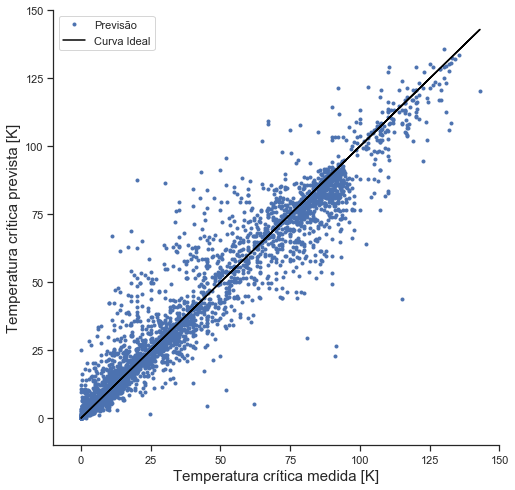

In [167]:
###   Gráfico que mostra sa previsões sobre o conjunto de teste   ###


print_x = Y_teste
print_y = treino.predict(X_teste)

fig, ax = plt.subplots(figsize=(8, 8))
# plt.title('Tc prevista pelo modelo vs. Tc medida em laboratório')
sns.set(style="ticks")
sns.despine()

plt.plot(print_x,print_y, 'b.',label = 'Previsão')
plt.plot(print_x,print_x, '-', label = 'Curva Ideal', color = 'black')

plt.xlabel('Temperatura crítica medida [K]',fontsize = 15)
plt.ylabel('Temperatura crítica prevista [K]',fontsize = 15)
plt.legend('Previsão')
plt.legend()
plt.xticks(np.linspace(0, 150, 7, endpoint=True))
plt.yticks(np.linspace(0, 150, 7, endpoint=True))
plt.axis([-10,150,-10,150])

plt.show()

In [123]:
###   Análise por faixa de temperatura   ###

In [124]:
#Dados das previsões e do bando de dados NIMS

dados_agrupamento=pd.DataFrame({'Y_teste':Y_teste ,'Y_previsto':treino.predict(X_teste)})


# condições para avaliar as faixas de temperatura

def agrupar(x):

  if x['Y_teste']<=25.67:

    return 1

  elif  x['Y_teste']<=51.33:

    return 2

  elif x['Y_teste']<= 77:

    return 3

  elif x['Y_teste'] <= 113.5:

    return 4
  
  elif x['Y_teste']<=150:

    return 5

In [125]:
# Apresenta a segmentação aos dados

dados_agrupamento['grupo'] = dados_agrupamento.apply(agrupar, axis=1)

In [126]:
# Calcula o erro em cada grupo

erros=[]
i_grupo=[]
#r2 = []

for i in [1,2,3,4,5]:    

    #r2.append(r2_score(dados_agrupamento.loc[dados_agrupamento['grupo']==i]['Y_teste'],dados_agrupamento.loc[dados_agrupamento['grupo']==i]['Y_previsto']))
    erros.append(np.sqrt(mean_squared_error(dados_agrupamento.loc[dados_agrupamento['grupo']==i]['Y_teste'],dados_agrupamento.loc[dados_agrupamento['grupo']==i]['Y_previsto'])))
    i_grupo.append(i)

In [127]:
np.array([erros,i_grupo])

array([[ 5.9741796 , 11.01277166, 11.40737115, 11.06574973, 12.15661165],
       [ 1.        ,  2.        ,  3.        ,  4.        ,  5.        ]])

[-10, 150, -10, 150]

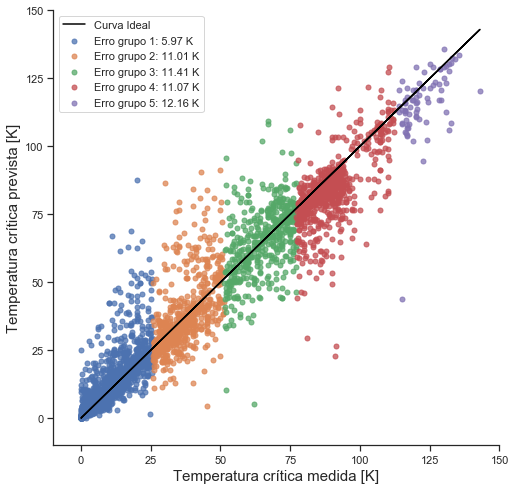

In [166]:
###   Plota a análise em cada faixa de temperatura   ###

fig, ax = plt.subplots(figsize=(8, 8))

sns.despine()

for i in [1,2,3,4,5]:

    legenda = "Erro grupo " + str(i) + ': ' +str(float("{0:.2f}".format(float(erros[i-1])))) + ' K'
    
    ax.scatter(dados_agrupamento.loc[dados_agrupamento['grupo']==i]['Y_teste'], dados_agrupamento.loc[dados_agrupamento['grupo']==i]['Y_previsto'],label=legenda, s=25, alpha=.75)

ax.plot(print_x,print_x, '-', label = 'Curva Ideal',color='black')

plt.xlabel('Temperatura crítica medida [K]',fontsize = 15)
plt.ylabel('Temperatura crítica prevista [K]',fontsize = 15)
plt.legend()
plt.xticks(np.linspace(0, 150, 7, endpoint=True))
plt.yticks(np.linspace(0, 150, 7, endpoint=True))
plt.axis([-10,150,-10,150])


In [129]:
###   Avaliando as principais características do modelo   ###

In [161]:
#Conjunto de dados usados para avaliar os melhores parâmetros

importancia = pd.DataFrame(np.transpose(treino.feature_importances_),index=X_treino.columns)
importancia_ordenada=importancia.sort_values(ascending=False,by=[0])
importancia_ordenada_top_15=np.transpose(importancia_ordenada.iloc[0:15,:])
importancia_ordenada_top_5=np.transpose(importancia_ordenada.iloc[0:5,:])

In [131]:
importancia_ordenada.index.values[0:2]

array(['range_ThermalConductivity', 'wtd_std_ThermalConductivity'],
      dtype=object)

In [163]:
r_quadrado = []
erro_rmse = []

treino_n_parametros=ExtraTreesRegressor(bootstrap=False, criterion='mse', max_depth=20,
                    max_features=None, max_leaf_nodes=None,
                    min_impurity_decrease=0.0, min_impurity_split=None,
                    min_samples_leaf=2, min_samples_split=4,
                    min_weight_fraction_leaf=0.0, n_estimators=475, n_jobs=None,
                    oob_score=False, random_state=None, verbose=0,
                    warm_start=False)

for n_parametros in range(len(X_treino.columns)+1):
    
    treino_n_parametros.fit(X_treino.loc[:,importancia_ordenada.index.values[0:(n_parametros+1)]],Y_treino)
    
    r_quadrado.append(treino_n_parametros.score(X_teste.loc[:,importancia_ordenada.index.values[0:(n_parametros+1)]],Y_teste))
    erro_rmse.append(np.sqrt(mean_squared_error(treino_n_parametros.predict(X_teste.loc[:,importancia_ordenada.index.values[0:(n_parametros+1)]]),Y_teste)))

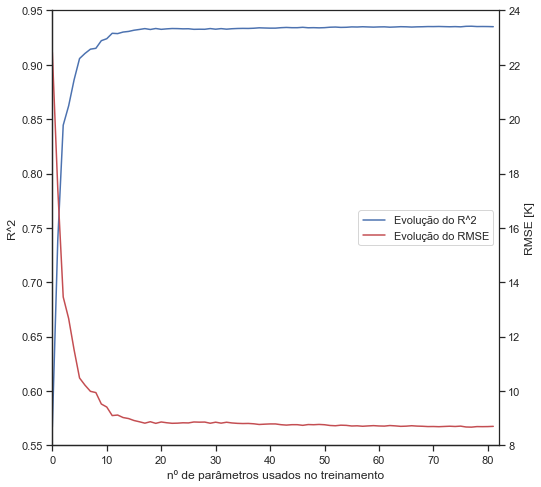

In [165]:
fig, ax = plt.subplots(figsize=(8, 8))

sns.set(style="ticks")
sns.despine()

lns1 = ax.plot(r_quadrado, '-',color='b', label = 'Evolução do R^2')
ax.set_ylabel('R^2') 
ax.set_xlabel('nº de parâmetros usados no treinamento')
# lns3 = ax.plot([81,81],[0,1], color = 'gray', label = 'nº parâmetros = 81')


ax2 = ax.twinx()
ax2.set_ylabel('RMSE [K]') 
lns2 = ax2.plot(erro_rmse, '-', label = 'Evolução do RMSE',color='r')

ax.set_ylim(0.55, 0.95)
ax.set_xlim(0,82)
ax2.set_ylim(8,24)

lns = lns1+lns2
labs = [l.get_label() for l in lns]
ax.legend(lns, labs, loc=5)


In [134]:
###   As 15 características mais importantes do modelo   ###

([<matplotlib.axis.XTick at 0x2211ee4a288>,
 <a list of 6 Text xticklabel objects>)

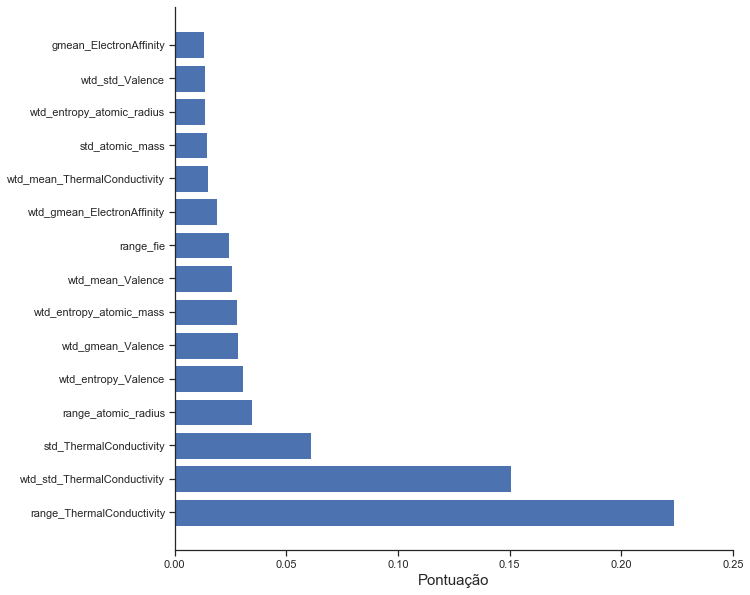

In [135]:
fig, ax = plt.subplots(figsize=(10, 10))

sns.despine()
plt.barh(importancia_ordenada_top_15.columns, importancia_ordenada_top_15.values[0],color="b")
plt.xlabel('Pontuação',fontsize = 15)
plt.xticks(np.linspace(0, 0.25, 6, endpoint=True))

In [136]:
X_treino_importancia = X_treino.loc[:,importancia_ordenada_top_15.columns]
X_teste_importancia = X_teste.loc[:,importancia_ordenada_top_15.columns]

In [137]:
treino_importancia=ExtraTreesRegressor(bootstrap=False, criterion='mse', max_depth=20,
                    max_features=None, max_leaf_nodes=None,
                    min_impurity_decrease=0.0, min_impurity_split=None,
                    min_samples_leaf=2, min_samples_split=4,
                    min_weight_fraction_leaf=0.0, n_estimators=475, n_jobs=None,
                    oob_score=False, random_state=None, verbose=0,
                    warm_start=False)

In [138]:
treino_importancia.fit(X_treino_importancia,Y_treino)

ExtraTreesRegressor(bootstrap=False, criterion='mse', max_depth=20,
                    max_features=None, max_leaf_nodes=None,
                    min_impurity_decrease=0.0, min_impurity_split=None,
                    min_samples_leaf=2, min_samples_split=4,
                    min_weight_fraction_leaf=0.0, n_estimators=475, n_jobs=None,
                    oob_score=False, random_state=None, verbose=0,
                    warm_start=False)

In [139]:
###   Imprime o resultado dos dados treinados   ###

print('\n R^2: \n', treino_importancia.score(X_treino_importancia,Y_treino), '\n RMSE : \n',np.sqrt(mean_squared_error(treino_importancia.predict(X_treino_importancia),Y_treino)))


 R^2: 
 0.9735954273955894 
 RMSE : 
 5.5587083248181


In [140]:
###   Imprime o resultado dos dados treinados   ###

print('\n R^2: \n', treino_importancia.score(X_teste_importancia,Y_teste), '\n RMSE : \n',np.sqrt(mean_squared_error(treino_importancia.predict(X_teste_importancia),Y_teste)))


 R^2: 
 0.9305633663046472 
 RMSE : 
 8.991325451920742


In [141]:
###   As 5 principais características do modelo   ###

([<matplotlib.axis.XTick at 0x2211eeff788>,
 <a list of 6 Text xticklabel objects>)

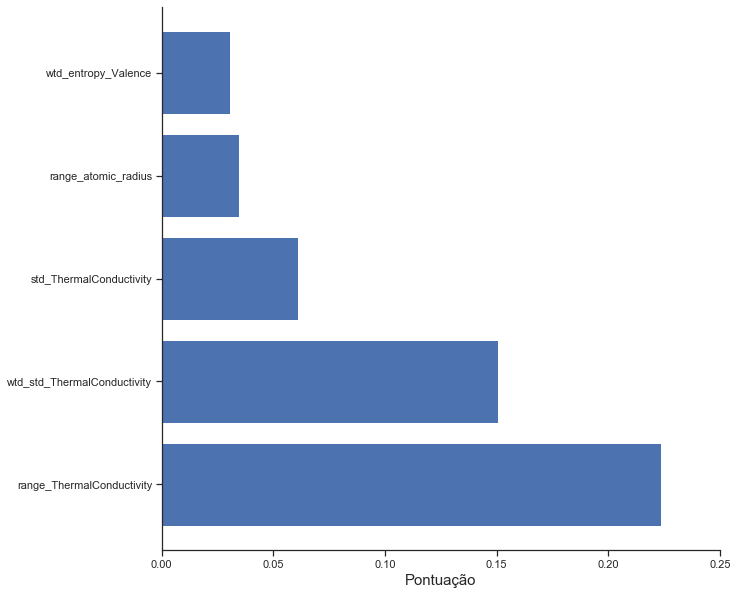

In [142]:
fig, ax = plt.subplots(figsize=(10, 10))

sns.despine()
plt.barh(importancia_ordenada_top_5.columns, importancia_ordenada_top_5.values[0],color="b")
plt.xlabel('Pontuação',fontsize = 15)
plt.xticks(np.linspace(0, 0.25, 6, endpoint=True))

In [143]:
X_treino_importancia_5 = X_treino.loc[:,importancia_ordenada_top_5.columns]
X_teste_importancia_5 = X_teste.loc[:,importancia_ordenada_top_5.columns]

In [144]:
treino_importancia_5=ExtraTreesRegressor(bootstrap=False, criterion='mse', max_depth=20,
                    max_features=None, max_leaf_nodes=None,
                    min_impurity_decrease=0.0, min_impurity_split=None,
                    min_samples_leaf=2, min_samples_split=4,
                    min_weight_fraction_leaf=0.0, n_estimators=475, n_jobs=None,
                    oob_score=False, random_state=None, verbose=0,
                    warm_start=False)

In [145]:
treino_importancia_5.fit(X_treino_importancia_5,Y_treino)

ExtraTreesRegressor(bootstrap=False, criterion='mse', max_depth=20,
                    max_features=None, max_leaf_nodes=None,
                    min_impurity_decrease=0.0, min_impurity_split=None,
                    min_samples_leaf=2, min_samples_split=4,
                    min_weight_fraction_leaf=0.0, n_estimators=475, n_jobs=None,
                    oob_score=False, random_state=None, verbose=0,
                    warm_start=False)

In [146]:
###   Imprime o resultado dos dados treinados   ###

print('\n R^2: \n', treino_importancia_5.score(X_treino_importancia_5,Y_treino), '\n RMSE : \n',np.sqrt(mean_squared_error(treino_importancia_5.predict(X_treino_importancia_5),Y_treino)))


 R^2: 
 0.932922812594901 
 RMSE : 
 8.859755508116635


In [147]:
###   Imprime o resultado dos dados treinados   ###

print('\n R^2: \n', treino_importancia_5.score(X_teste_importancia_5,Y_teste), '\n RMSE : \n',np.sqrt(mean_squared_error(treino_importancia_5.predict(X_teste_importancia_5),Y_teste)))


 R^2: 
 0.8862098815068529 
 RMSE : 
 11.510168028144307


In [148]:
### Testes com supercondutores do DEMAR EEL USP ###

In [149]:
# 9.5 K no Ti2GeC
# 4.1 K no HfV2Ga4
# 4.0 K no NiTe2
# 3.1 K no Ti2InC
# 7.8 K no Nb2SnC
# 8.7 K no Zr0.96V0.04B2
# 15.3 K no Nb5Ge3
# 7 K no Zr5Pt3C0.3

# 20 K no Ba0.84K0.16Fe2As2
  

In [150]:
# 9.5 K no Ti2GeC

treino.predict(tsd.analisar('Ti2GeC'))

Material:  Ti2Ge1C1


array([8.3950782])

In [151]:
# 4.1 K no HfV2Ga4

treino.predict(tsd.analisar('HfV2Ga4'))

Material:  Hf1V2Ga4


array([6.42442397])

In [152]:
# 4.0 K no NiTe2

treino.predict(tsd.analisar('NiTe2'))

Material:  Ni1Te2


array([2.97899823])

In [153]:
# 3.1 K no Ti2InC

treino.predict(tsd.analisar('Ti2InC'))

Material:  Ti2In1C1


array([3.85025701])

In [154]:
# 7.8 K no Nb2SnC

treino.predict(tsd.analisar('Nb2SnC'))

Material:  Nb2Sn1C1


array([5.96246339])

In [155]:
# 8.7 K no Zr0.96V0.04B2

treino.predict(tsd.analisar('Zr0.96V0.04B2'))

Material:  Zr0.96V0.04B2


array([7.87627185])

In [156]:
# 15.3 K no Nb5Ge3

treino.predict(tsd.analisar('Nb5Ge3'))

Material:  Nb5Ge3


array([1.33996406])

In [157]:
# 7 K no Zr5Pt3C0.3

treino.predict(tsd.analisar('Zr5Pt3C0.3'))

Material:  Zr5Pt3C0.3


array([5.90751681])

In [158]:
# 83.5 K e 82.9 K no Bi2Sr2CaCu2O8 

treino.predict(tsd.analisar('Bi2Sr2CaCu2O8'))

Material:  Bi2Sr2Ca1Cu2O8


array([79.47271846])